In [1]:
# Load libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tempset = "proc.data"
names = ['Genome', 'Fitness']
dataset = pd.read_csv(tempset, sep=',', names = names)
print(dataset.head(20))

def split(word):
    return [int(char) for char in str(word)]

tidy_genome = np.zeros((dataset.shape[0], 12))

genome_list = dataset['Genome']

for i in range(len(genome_list)):
    tidy_genome[i,:] = split(genome_list[i])



          Genome  Fitness
0   111111111111      200
1   111111111112     1393
2   111111111113     1869
3   111111111121     1597
4   111111111122     1896
5   111111111123     1960
6   111111111131     1875
7   111111111132     1959
8   111111111133     1961
9   111111111211     1639
10  111111111212     1683
11  111111111213     1895
12  111111111221     1848
13  111111111222     1904
14  111111111223     1964
15  111111111231     1904
16  111111111232     1949
17  111111111233     1959
18  111111111311     1852
19  111111111312     1858


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    tidy_genome, dataset['Fitness']*1/2000.0, test_size=0.7, random_state=0)

In [4]:
print("TRAINING DATA =========")
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))


TRAINING DATA =========
X_train shape: (159432, 12)
y_train shape: (159432,)


In [5]:
print("TESTING DATA =========")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

TESTING DATA =========
X_test shape: (372009, 12)
y_test shape: (372009,)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [7]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=12, activation='linear'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(20, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:

# Fit the model
model.fit(X_train, y_train, epochs=20, batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
159432/159432 [==============================] - 36s 226us/step - loss: 0.4663 - acc: 0.0000e+00
Epoch 2/20
159432/159432 [==============================] - 17s 105us/step - loss: 0.4632 - acc: 0.0000e+00
Epoch 3/20
159432/159432 [==============================] - 15s 92us/step - loss: 0.4622 - acc: 0.0000e+00
Epoch 4/20
159432/159432 [==============================] - 16s 98us/step - loss: 0.4616 - acc: 0.0000e+00
Epoch 5/20
159432/159432 [==============================] - 15s 95us/step - loss: 0.4614 - acc: 0.0000e+00 1s - loss
Epoch 6/20
159432/159432 [==============================] - 14s 87us/step - loss: 0.4612 - acc: 0.0000e+00
Epoch 7/20
159432/159432 [==============================] - 16s 99us/step - loss: 0.4611 - acc: 0.0000e+00 0s - loss: 0.4610 - 
Epoch 8/20
159432/159432 [==============================] - 14s 87us/step - loss: 0.4610 - acc: 0.0000e+00
Epoch 9/20
159432/159432 [==============================] - 13s

In [10]:
Xnew = np.array([[3,1,1,1,1,1,1,1,1,1,1,3]])
# make a prediction
ynew = model.predict(Xnew)
print(ynew)

predicted_array = np.zeros(len(X_test))

#predicted_array[0] = model.predict(np.array(X_test[0,:]))
print(X_test.shape[0])

y_pred = np.zeros(X_test.shape[0])

for i in range(X_test.shape[0]):
    Xnew = np.array([X_test[i,:]])
    Ynew = model.predict(Xnew)
    y_pred[i] = Ynew
    


[[0.9757633]]
372009


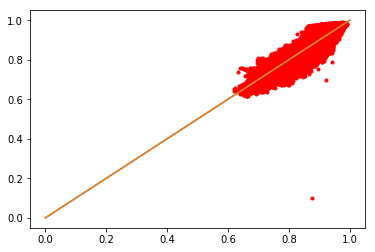

In [11]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
t1 = [0,0.5, 1]

s1 = [0,0.5, 1]

plt.plot(y_pred[0:X_test.shape[0]], y_test[0:X_test.shape[0]], 'r.', t1, t1, s1, s1)

plt.show()